# Module 7: Unsupervised ML on healthcare dataset features

## Section 1: Wrap-up features that created from assignment 5

### Section 1.1: Data Preparation, change columns and data types

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('inpatientCharges.csv')
data.columns = ['DRG','Provider_Id', 'Provider_Name','Provider_StreetAddress','Provider_City',
               'Provider_State','Provider_Zipcode','Hospital_referral_region_desp',
                'Total_Discharges','Average_Covered_Charges','Average_Total_Payments',
                'Average_Medicare_Payment']
data = data.drop('Average_Covered_Charges',axis=1)
data.head(1)

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$5777.24,$4763.73


In [42]:
# Change data type and transfer spending amount with dollar sign into numeric
data['DRG'] = data['DRG'].astype('category')
data['Provider_State'] = data['Provider_State'].astype('category')
data['Provider_City'] = data['Provider_City'].astype('category')
data['Provider_Id'] = data['Provider_Id'].astype('category')
data['Average_Total_Payments'] = (data['Average_Total_Payments']
                              .str.replace(r'[^-+\d.]', '').astype(float))
data['Average_Medicare_Payment'] = (data['Average_Medicare_Payment']
                              .str.replace(r'[^-+\d.]', '').astype(float))

/var/folders/4_/810dy4d13s9c2627491y7jdh0000gn/T/ipykernel_1648/2932651901.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Average_Total_Payments'] = (data['Average_Total_Payments']
/var/folders/4_/810dy4d13s9c2627491y7jdh0000gn/T/ipykernel_1648/2932651901.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Average_Medicare_Payment'] = (data['Average_Medicare_Payment']


### Section 1.2: Feature Engineering

#### Section 1.2.1: Create benchmark tables - State & DRG average

In [43]:
# AVG
benchmark_avg = data.groupby(['Provider_State','DRG'])['Average_Total_Payments'].mean().reset_index()
benchmark_avg.columns = ['Provider_State','DRG','Avg_Payment_ByStateDRG']
#benchmark_avg.head()

# Median
benchmark_median = data.groupby(['Provider_State','DRG'])['Average_Total_Payments'].median().reset_index()
benchmark_median.columns = ['Provider_State','DRG','Avg_Payment_ByStateDRG']
#benchmark_median.head()

#### Section 1.2.1: Create benchmark tables - State & DRG average on "Average Medicare Payments"

In [44]:
# Overall Mean
benchmark_overall_avg = data[['Average_Total_Payments','Average_Medicare_Payment','Total_Discharges']].mean()
benchmark_overall_avg = pd.DataFrame(benchmark_overall_avg).T
benchmark_overall_avg

# Overall Median
#benchmark_Overall_median = data[['Average_Total_Payments','Average_Medicare_Payment','Total_Discharges']].median()
#benchmark_Overall_median = pd.DataFrame(benchmark_Overall_median).T
#benchmark_Overall_median

benchmark_Overall_Average = data[['Average_Total_Payments','Average_Medicare_Payment','Total_Discharges']].median()
benchmark_Overall_Average = pd.DataFrame(benchmark_Overall_Average).T
#benchmark_Overall_Average

# Median by state
benchmark_by_State = data.groupby(['Provider_State'])[['Average_Total_Payments','Average_Medicare_Payment','Total_Discharges']].median().reset_index()
benchmark_by_State.columns = ['Provider_State','Median_Average_Total_Payments','Median_Medicare_Payment','Median_Total_Discharges']
#benchmark_by_State.head()

# Median by state&DRG
benchmark_by_StateDRG = data.groupby(['Provider_State','DRG'])[['Average_Total_Payments','Average_Medicare_Payment','Total_Discharges']].median().reset_index()
benchmark_by_StateDRG.columns = ['Provider_State','DRG','Median_Average_Total_Payments','Median_Medicare_Payment','Median_Total_Discharges']
#benchmark_by_StateDRG.head()

# Mean by state&DRG
benchmark_by_StateDRG_avg = data.groupby(['Provider_State','DRG'])[['Average_Total_Payments','Average_Medicare_Payment','Total_Discharges']].mean().reset_index()
benchmark_by_StateDRG_avg.columns = ['Provider_State','DRG','Median_Average_Total_Payments','Median_Medicare_Payment','Median_Total_Discharges']
#benchmark_by_StateDRG_avg.head()

#### Section 1.2.2: Revise Features and merge to dataset

In [45]:
Feature123 = pd.DataFrame()
Feature123['Avg_Total_Pymts_by_id_mean_Ratio'] = data['Average_Total_Payments']/benchmark_overall_avg['Average_Total_Payments']
Feature123['Avg_Medicare_Pymts_by_id_mean_Ratio'] = data['Average_Medicare_Payment']/benchmark_overall_avg['Average_Medicare_Payment']
Feature123['Avg_Total_Discharges_by_id_mean_Ratio'] = data['Total_Discharges']/benchmark_overall_avg['Total_Discharges']

Feature123.head(1)

,Avg_Total_Pymts_by_id_mean_Ratio,Avg_Medicare_Pymts_by_id_mean_Ratio,Avg_Total_Discharges_by_id_mean_Ratio
0,0.595133,0.560802,2.127346


##### Thought process:

1. On assignment 5, I created 3 features('Average_Total_Payments','Average_Medicare_Payment','Total_Discharges') for 'overall' level in mean, 3 features in 'overall' level in median; 3 features for 'ST' level in mean, 3 features for 'ST&DRG'level in mean
2. For better accuracy improvement, I'd like to change the 3 features that created for 'overall' level in mean, change to 'ST&DRG' level in mean; These 3 features are feature 10-12 in the following

#### Feature 1-3: Compare total payments, medicare payments, total discharges to 'overall median' bechmark

In [46]:
df = pd.DataFrame()
df = df.append([benchmark_Overall_Average]*data.shape[0],ignore_index=True)
# rename columns
df = df.rename(columns={'Average_Total_Payments': 'Median_Avg_Total_Pymts', 
                        'Average_Medicare_Payment': 'Median_Avg_Medicare_Pymt',
                       'Total_Discharges': 'Median_Total_Discharges'})
#df

/var/folders/4_/810dy4d13s9c2627491y7jdh0000gn/T/ipykernel_1648/2184401094.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([benchmark_Overall_Average]*data.shape[0],ignore_index=True)


In [47]:
Feature123 = pd.DataFrame()
Feature123['Avg_Total_Pymts_Ratio'] = data['Average_Total_Payments']/df['Median_Avg_Total_Pymts']
Feature123['Avg_Medicare_Pymt_Ratio'] = data['Average_Medicare_Payment']/df['Median_Avg_Medicare_Pymt']
Feature123['Avg_Total_Discharges_Ratio'] = data['Total_Discharges']/df['Median_Total_Discharges']

#Feature123.head()

In [48]:
# Create an empty dataframe to collect the features
Features = pd.DataFrame()
Features[['ST','DRG']] = data[['Provider_State','DRG']]


# add the new feature average spending to the dataset 
Features =  [Features,Feature123]
Features = pd.concat(Features,axis=1)
Features.head(3)

,ST,DRG,Avg_Total_Pymts_Ratio,Avg_Medicare_Pymt_Ratio,Avg_Total_Discharges_Ratio
0,AL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,0.800826,0.773526,3.370370
1,AL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,0.802258,0.808109,0.518519
2,AL,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,0.753379,0.723199,0.888889


#### Feature 4-6: The ratio of total payments, medicare payments, total discharges to 'State level median' bechmark

In [49]:
# add the new feature average spending to the dataset 
F456 = pd.merge(data, benchmark_by_State, how='left', on='Provider_State')
#F456.head()

In [50]:
Average_Total_Payments_byST = F456['Average_Total_Payments']/F456['Median_Average_Total_Payments']
Medicare_Payment_byST = F456['Average_Medicare_Payment']/F456['Median_Medicare_Payment']
Total_Discharges_byST = F456['Total_Discharges']/F456['Median_Total_Discharges']

Features['Avg_Total_Pymt_byST'] = Average_Total_Payments_byST
Features['Medicare_Pymt_byST'] = Average_Total_Payments_byST
Features['Total_Discharges_byST'] = Total_Discharges_byST
Features.tail(3)

,ST,DRG,Avg_Total_Pymts_Ratio,Avg_Medicare_Pymt_Ratio,Avg_Total_Discharges_Ratio,Avg_Total_Pymt_byST,Medicare_Pymt_byST,Total_Discharges_byST
163062,TX,948 - SIGNS & SYMPTOMS W/O MCC,0.790724,0.658989,0.703704,0.823440,0.823440,0.76
163063,TX,948 - SIGNS & SYMPTOMS W/O MCC,1.062238,1.112054,0.407407,1.106188,1.106188,0.44
163064,TX,948 - SIGNS & SYMPTOMS W/O MCC,0.490671,0.468853,0.444444,0.510973,0.510973,0.48


#### Feature 7-9: The ratio of total payments, medicare payments, total discharges to 'State&DRG level median bechmark

In [51]:
# add the new feature average spending to the dataset 
F789 = pd.merge(data, benchmark_by_StateDRG, how='left', on='Provider_State' and 'DRG')
#F789.head()

In [52]:
Average_Total_Payments_bySTDRG = F789['Average_Total_Payments']/F789['Median_Average_Total_Payments']
Medicare_Payment_bySTDRG = F789['Average_Medicare_Payment']/F789['Median_Medicare_Payment']
Total_Discharges_bySTDRG = F789['Total_Discharges']/F789['Median_Total_Discharges']

Features['Avg_Total_Pymt_bySTDRG'] = Average_Total_Payments_bySTDRG
Features['Medicare_Pymt_bySTDRG'] = Average_Total_Payments_bySTDRG
Features['Total_Discharges_bySTDRG'] = Total_Discharges_bySTDRG

#### Feature 10-12: The ratio of total payments, medicare payments, total discharges to 'State&DRG level mean bechmark

In [53]:
# add the new feature average spending to the dataset 
F101112 = pd.merge(data, benchmark_by_StateDRG_avg, how='left', on='Provider_State' and 'DRG')
#F101112.head(3)

In [54]:
Average_Total_Payments_bySTDRG_avg = F101112['Average_Total_Payments']/F101112['Median_Average_Total_Payments']
Medicare_Payment_bySTDRG_avg = F101112['Average_Medicare_Payment']/F101112['Median_Medicare_Payment']
Total_Discharges_bySTDRG_avg = F101112['Total_Discharges']/F101112['Median_Total_Discharges']

Features['Avg_Total_Pymt_bySTDRG_avg'] = Average_Total_Payments_bySTDRG_avg
Features['Medicare_Pymt_bySTDRG_avg'] = Average_Total_Payments_bySTDRG_avg
Features['Total_Discharges_bySTDRG_avg'] = Total_Discharges_bySTDRG_avg

# For some hospitals, it is possible Total Discharges=0 and cause missing values in the dataset, 
Features.iloc[:,8:] = Features.iloc[:,8:].fillna(0)
Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   ST                            163065 non-null  category
 1   DRG                           163065 non-null  category
 2   Avg_Total_Pymts_Ratio         163065 non-null  float64 
 3   Avg_Medicare_Pymt_Ratio       163065 non-null  float64 
 4   Avg_Total_Discharges_Ratio    163065 non-null  float64 
 5   Avg_Total_Pymt_byST           163065 non-null  float64 
 6   Medicare_Pymt_byST            163065 non-null  float64 
 7   Total_Discharges_byST         163065 non-null  float64 
 8   Avg_Total_Pymt_bySTDRG        163065 non-null  float64 
 9   Medicare_Pymt_bySTDRG         163065 non-null  float64 
 10  Total_Discharges_bySTDRG      163065 non-null  float64 
 11  Avg_Total_Pymt_bySTDRG_avg    163065 non-null  float64 
 12  Medicare_Pymt_bySTDRG_avg     

#### Features visualization

<AxesSubplot:xlabel='variable', ylabel='value'>

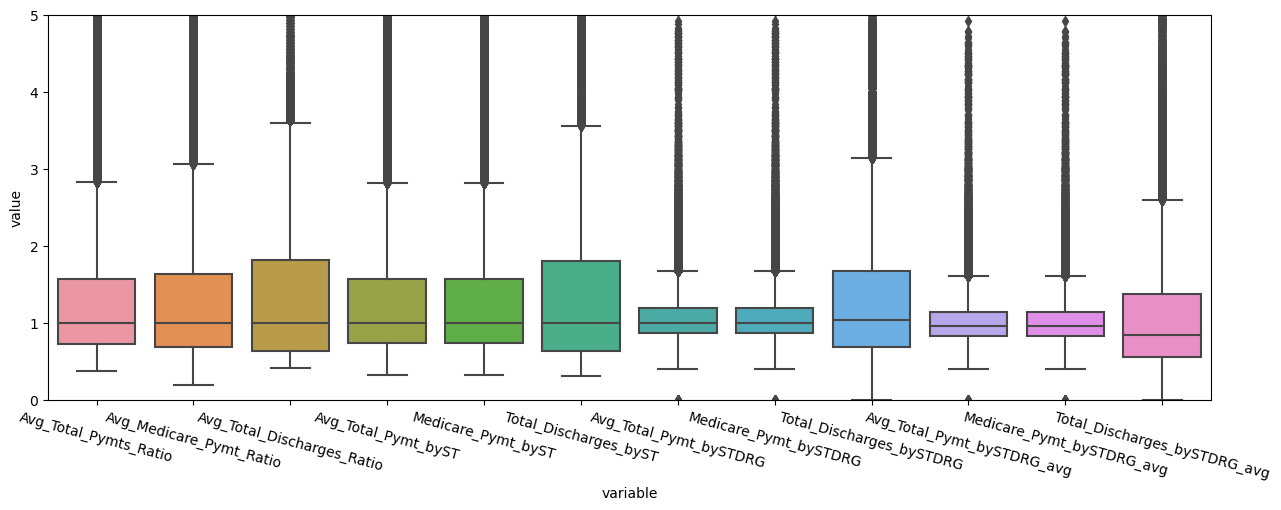

In [55]:
plt.figure(figsize=(15,5)) # Plot a graph with reasonable size.
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,0,5))
plt.xticks(rotation=-15)

sns.boxplot(x="variable", y="value", data=pd.melt(Features.iloc[:,2::]))

<AxesSubplot:xlabel='variable', ylabel='value'>

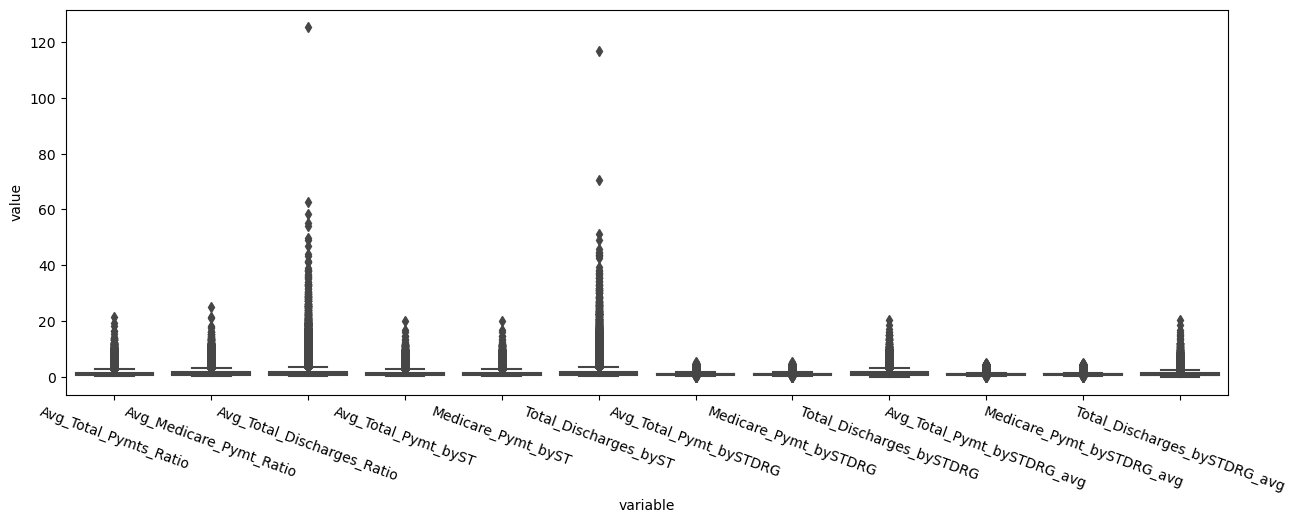

In [56]:
plt.figure(figsize=(15,5)) # Plot a graph with reasonable size.
plt.xticks(rotation=-20)

sns.boxplot(x="variable", y="value", data=pd.melt(Features.iloc[:,2::]))

### Summary:
1. From the features boxplot, we can see that every features are right skewed, and for some features, their anomalous outlier have reached 120 times more than ratio;
2. There are so many anomalies in the dataset, and our features can help us to find these data points;
3. Since we don't have target variable, we will use unsupervised ML technique to find anomalies.

# Section 2: Modeling

## Section 2.1: Standardization

In [57]:
# 0.Standardize and Scale the Dataset
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import StandardScaler

'''
variables = ['Avg_Total_Pymts_Ratio', 'Avg_Medicare_Pymt_Ratio', 'Avg_Total_Discharges_Ratio', 'Avg_Total_Pymt_byST', 'Medicare_Pymt_byST','Total_Discharges_byST', 'Avg_Total_Pymt_bySTDRG', 'Medicare_Pymt_bySTDRG', 'Total_Discharges_bySTDRG', 'Avg_Total_Pymt_bySTDRG_avg', 'Medicare_Pymt_bySTDRG_avg', 'Total_Discharges_bySTDRG_avg']
x = df.loc[:, variables].values
#y = df.loc[:,[target]].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)


'''
#0. Standardize and scale the Dataset, the numeric variables
scaler = StandardScaler()
scaler.fit(Features.drop(['DRG','ST'], axis=1))

scaled_features = scaler.transform(Features.drop(['DRG','ST'], axis=1))
scaled_df = pd.DataFrame(scaled_features, columns = Features.drop(['DRG','ST'],axis=1).columns)

scaled_df.head(3)

,Avg_Total_Pymts_Ratio,Avg_Medicare_Pymt_Ratio,Avg_Total_Discharges_Ratio,Avg_Total_Pymt_byST,Medicare_Pymt_byST,Total_Discharges_byST,Avg_Total_Pymt_bySTDRG,Medicare_Pymt_bySTDRG,Total_Discharges_bySTDRG,Avg_Total_Pymt_bySTDRG_avg,Medicare_Pymt_bySTDRG_avg,Total_Discharges_bySTDRG_avg
0,-0.512776,-0.510403,0.943640,-0.344831,-0.344831,1.128103,-1.116364,-1.116364,2.524320,-1.037184,-1.037184,3.286577
1,-0.511428,-0.481265,-0.563094,-0.343103,-0.343103,-0.547925,-0.120457,-0.120457,1.732056,-0.037967,-0.037967,1.469360
2,-0.557435,-0.552805,-0.367414,-0.402073,-0.402073,-0.330259,-0.240415,-0.240415,1.536120,-0.231628,-0.231628,1.298659


## Section 2.2: PCA

### What's PCA?
PCA stands for Principal Component Analysis, it's a dimension reduction technique, the main goal is to lower/reduce dimensions and preserving as much information and variance as possible; to achieve the closer distance from data point to projected lines, PCA needs to maximize the length of the other right-angled side since the distance from the data point to the origin is constant(Pythagorean theorem).

### Why PCA?
Since we have previouly created 12 features, PCA could helps in reducing the number of redundant features while retaining as much information as possible, therefore increase the readibility/interpretablity of modeling.

### Section 2.2.1: Train-test split

In [58]:
#split dataset
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test = train_test_split(scaled_df, test_size=0.3, random_state=42)

### Section 2.2.2: Build PCA model

In [59]:
from pyod.models.pca import PCA
pca = PCA(contamination=0.05) 
pca.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = pca.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = pca.decision_scores_  # .decision_scores_ yields the raw outlier scores for the training data
y_train_scores = pca.decision_function(X_train) # You also can use .decision_function()
y_train_pred = pca.predict(X_train) # You also can use .decision_function()

y_test_scores = pca.decision_function(X_test) # You also can use .decision_function()
y_test_pred = pca.predict(X_test) # You also can use .decision_function()

In [60]:
pca.get_params()

{'contamination': 0.05,
 'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'n_selected_components': None,
 'random_state': None,
 'standardization': True,
 'svd_solver': 'auto',
 'tol': 0.0,
 'weighted': True,
 'whiten': False}

In [61]:
[pca.explained_variance_,
pca.explained_variance_ratio_]

[array([4.19784459e+00, 3.74521485e+00, 1.99316008e+00, 1.93752937e+00,
        5.89790353e-02, 3.71236874e-02, 1.13169497e-02, 1.04460761e-02,
        8.49048735e-03, 1.88607628e-33, 1.35501939e-33, 1.34997971e-35]),
 array([3.49817318e-01, 3.12098504e-01, 1.66095218e-01, 1.61459366e-01,
        4.91487655e-03, 3.09361351e-03, 9.43070883e-04, 8.70498719e-04,
        7.07534414e-04, 1.57171646e-34, 1.12917293e-34, 1.12497323e-36])]

In [62]:
explained_variance = pca.explained_variance_ratio_
explained_variance

explained_variance = np.array([3.49817318e-01, 3.12098504e-01, 1.66095218e-01, 1.61459366e-01, 4.91487655e-03, 3.09361351e-03, 9.43070883e-04, 8.70498719e-04, 7.07534414e-04, 1.57171646e-34, 1.12917293e-34, 1.12497323e-36])
formatted_explained_variance = ["{:.10f}".format(variance) for variance in explained_variance]

# Print the formatted numbers
print(formatted_explained_variance)

['0.3498173180', '0.3120985040', '0.1660952180', '0.1614593660', '0.0049148765', '0.0030936135', '0.0009430709', '0.0008704987', '0.0007075344', '0.0000000000', '0.0000000000', '0.0000000000']


In [63]:
explained_variance = np.insert(explained_variance, 0, 0)
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3','PC4',"PC5",'PC6','PC7','PC8','PC9','PC10','PC11','PC12'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance


,PC,Explained Variance,Cumulative Variance
0,,0.000000e+00,0.000
1,PC1,3.498173e-01,0.350
2,PC2,3.120985e-01,0.662
3,PC3,1.660952e-01,0.828
4,PC4,1.614594e-01,0.989
5,PC5,4.914877e-03,0.994
6,PC6,3.093614e-03,0.997
7,PC7,9.430709e-04,0.998
8,PC8,8.704987e-04,0.999
9,PC9,7.075344e-04,1.000


### Section 2.2.3: Determine the threshold

In [64]:
print("The threshold for the defined comtanimation rate:" , pca.threshold_)

The threshold for the defined comtanimation rate: 6.098192472581077e+36


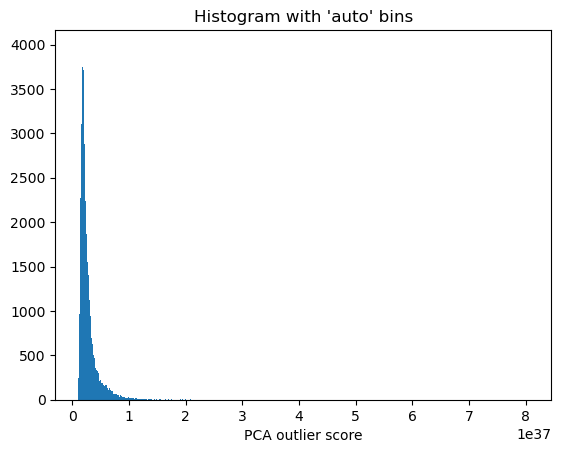

In [65]:
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.xlabel('PCA outlier score')
plt.show()

### Section 2.2.4: Descriptive statistics of the normal and the abnormal groups

In [66]:
threshold = pca.threshold_
threshold

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,Avg_Total_Pymts_Ratio,Avg_Medicare_Pymt_Ratio,Avg_Total_Discharges_Ratio,Avg_Total_Pymt_byST,Medicare_Pymt_byST,Total_Discharges_byST,Avg_Total_Pymt_bySTDRG,Medicare_Pymt_bySTDRG,Total_Discharges_bySTDRG,Avg_Total_Pymt_bySTDRG_avg,Medicare_Pymt_bySTDRG_avg,Total_Discharges_bySTDRG_avg,Anomaly_Score
0,Normal,108437,94.999343,-0.11,-0.11,-0.05,-0.11,-0.11,-0.05,-0.06,-0.06,-0.04,-0.06,-0.06,-0.04,2.419126e+36
1,Outlier,5708,5.000657,2.12,2.10,0.98,2.10,2.10,0.99,1.07,1.07,0.79,1.07,1.07,0.78,8.568635e+36


In [67]:
descriptive_stat_threshold(X_test,y_test_scores, threshold)

,Group,Count,Count %,Avg_Total_Pymts_Ratio,Avg_Medicare_Pymt_Ratio,Avg_Total_Discharges_Ratio,Avg_Total_Pymt_byST,Medicare_Pymt_byST,Total_Discharges_byST,Avg_Total_Pymt_bySTDRG,Medicare_Pymt_bySTDRG,Total_Discharges_bySTDRG,Avg_Total_Pymt_bySTDRG_avg,Medicare_Pymt_bySTDRG_avg,Total_Discharges_bySTDRG_avg,Anomaly_Score
0,Normal,46537,95.128782,-0.11,-0.11,-0.05,-0.11,-0.11,-0.05,-0.05,-0.05,-0.04,-0.06,-0.06,-0.04,2.421752e+36
1,Outlier,2383,4.871218,2.05,2.03,0.90,2.02,2.02,0.88,1.14,1.14,0.81,1.14,1.14,0.81,8.454950e+36


### PCA Analysis:
1. From the PCA cumulative variance graph, we can conclude that PC1 explained 35% of the variance, PC1-PC4 explain 98.9% of the variance, PC5-PC12 explained the left variance (less than 1.1%);
2. 4 principal components covered 98.9% variance and data for the whole dataset, PCA helps us to reduce the dimension of large dataset and avoid overfitting problem.

### Identify anomalous cluster:
1. Based on the threshold, we seperate the normal and outliers group, for each group we calculate the anomaly score in mean, for both train and test dataset;
2. The anomaly score of each variable in 'outlier' group is higher than 'normal' group, for example, in feature 'Avg_Total_Pymts_Ratio', the anomaly score of 'normal' group in mean is -0.11 and the anomaly score of 'outlier' group is 2.12; also, the anomaly score of 'outlier' group is 4 times highere than the 'normal' group. Therefor 'outlier' group in both train and test dataset is the anomalous/outlier group.

## Section 2.3: KNN

### What's KNN?
KNN stands for k-Nearest Neighbors. since KNNs is used for the computation of the distance to the k neighbors, so KNN does not have any learning involved, therefore, there are no parameters we can tune to make the performance better.

### Why KNN?
In anomaly detection,  an outlier is a point that is distant from neighboring points, a higher score means abnormal datapoint

### Section 2.3.1: Train-test split

In [68]:
X = scaled_df
#y = data[['DRG','Provider_Name','Provider_City','Provider_State']]

In [69]:
# 1. Split data into X_train and X_test
from pyod.models.knn import KNN
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)
#X_train_pd = pd.DataFrame(X_train)

In [70]:
print(X_train.shape, X_test.shape)

(114145, 12) (48920, 12)


### Section 2.3.2: Build KNN model

In [71]:
# train kNN detector
from pyod.models.knn import KNN
knn = KNN()
knn.fit(X_train)
# If you want to see the predictions of the training data, you can use this way:
y_train_scores = knn.decision_scores_

In [72]:
knn.get_params()

{'algorithm': 'auto',
 'contamination': 0.1,
 'leaf_size': 30,
 'method': 'largest',
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'radius': 1.0}

### Section 2.3.3: Determine the threshold

In [73]:
from pyod.models.knn import KNN
knn = KNN(contamination=0.05) 
knn.fit(X_train)

# Training data
y_train_scores = knn.decision_function(X_train)
y_train_pred = knn.predict(X_train)

# Test data
y_test_scores = knn.decision_function(X_test)
y_test_pred = knn.predict(X_test) # outlier labels (0 or 1)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
print("The training data:", count_stat(y_test_pred))
# Threshold for the defined comtanimation rate
print("The threshold for the defined comtanimation rate:" , knn.threshold_)

The training data: {0: 109021, 1: 5124}
The training data: {0: 46486, 1: 2434}
The threshold for the defined comtanimation rate: 0.8410626227549308


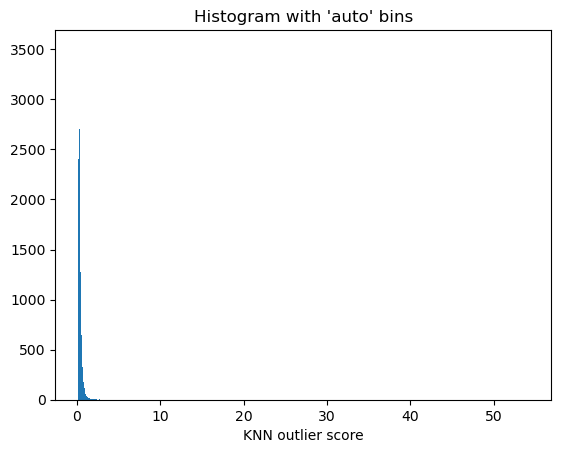

In [74]:
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.xlabel('KNN outlier score')
plt.show()

### Section 2.3.4: Descriptive statistics of the normal and the abnormal groups

In [75]:
threshold = knn.threshold_ # Or other value from the above histogram

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,Avg_Total_Pymts_Ratio,Avg_Medicare_Pymt_Ratio,Avg_Total_Discharges_Ratio,Avg_Total_Pymt_byST,Medicare_Pymt_byST,Total_Discharges_byST,Avg_Total_Pymt_bySTDRG,Medicare_Pymt_bySTDRG,Total_Discharges_bySTDRG,Avg_Total_Pymt_bySTDRG_avg,Medicare_Pymt_bySTDRG_avg,Total_Discharges_bySTDRG_avg,Anomaly_Score
0,Normal,109021,95.510973,-0.07,-0.07,-0.07,-0.07,-0.07,-0.08,-0.04,-0.04,-0.07,-0.04,-0.04,-0.07,0.34
1,Outlier,5124,4.489027,1.56,1.48,1.63,1.48,1.48,1.65,0.80,0.80,1.48,0.80,0.80,1.42,1.27


In [78]:
descriptive_stat_threshold(X_test,y_test_scores, threshold)

,Group,Count,Count %,Avg_Total_Pymts_Ratio,Avg_Medicare_Pymt_Ratio,Avg_Total_Discharges_Ratio,Avg_Total_Pymt_byST,Medicare_Pymt_byST,Total_Discharges_byST,Avg_Total_Pymt_bySTDRG,Medicare_Pymt_bySTDRG,Total_Discharges_bySTDRG,Avg_Total_Pymt_bySTDRG_avg,Medicare_Pymt_bySTDRG_avg,Total_Discharges_bySTDRG_avg,Anomaly_Score
0,Normal,46486,95.02453,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,-0.03,-0.03,-0.08,-0.04,-0.04,-0.07,0.35
1,Outlier,2434,4.97547,1.51,1.43,1.48,1.43,1.43,1.48,0.75,0.75,1.47,0.75,0.75,1.39,1.27


### KNN Analysis:
1. For KNN modeling, we set up the k to 5, which is compute the distance for 5 neighbors, for each data point,it then identifies the 5 points that are closest to the one being evaluated.
2. For classify, if the majority of the k nearest neighbors are of the same class (in the case of classification), then the point is classified as that class; however, if the point has a different class from the majority, or if there is no clear majority, it may be considered an outlier.
3. Therefor, if the point's class differs significantly from the majority of its 5 nearest neighbors, it could be considered an anomaly.

### Identify anomalous cluster:
1. Based on the threshold=0.84, we seperate the normal and outliers group, for each group we calculate the anomaly score in mean, for both train and test dataset;
2. The anomaly score of each variable in 'outlier' group is higher than 'normal' group, for example, in feature 'Avg_Total_Pymts_Ratio', the anomaly score of 'normal' group in mean is -0.07 and the anomaly score of 'outlier' group is 1.56; also, the anomaly score of 'outlier' group is 4 times highere than the 'normal' group(train: 0.34 to 1.27; test: 0.35% to 1.27%). Therefor 'outlier' group in both train and test dataset is the anomalous/outlier group.

# Summary

##### Business insight:
The "Outlier" group might might represent cases that need closer examination, this could be due to potential fraud, this group represent cases that are unusual but not necessarily fraudulent. They might be cases that require special attention due to their high values. We can use the invesitigate in these cases and trace back the datapoint to the original dataset, find out the common points that these anomalies have made, remark them and use these as important variables/feature therefor further improve our initial modeling regulatories.